In [ ]:
from google.colab import drive
import os

drive.mount('/content/gdrive')
path = "/content/gdrive/MyDrive/NLP/BERT"
os.chdir(path)
!ls

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
!pip3 install fairseq
!pip3 install fastbpe

In [ ]:
# Load the model in fairseq
from fairseq.models.roberta import RobertaModel
phoBERT = RobertaModel.from_pretrained('PhoBERT_base_fairseq', checkpoint_file='model.pt')
phoBERT.eval()  # disable dropout (or leave in train mode to finetune

1042301B [00:00, 1957814.46B/s]
456318B [00:00, 984982.59B/s]


RobertaHubInterface(
  (model): RobertaModel(
    (encoder): RobertaEncoder(
      (sentence_encoder): TransformerSentenceEncoder(
        (dropout_module): FairseqDropout()
        (embed_tokens): Embedding(64001, 768, padding_idx=1)
        (embed_positions): LearnedPositionalEmbedding(258, 768, padding_idx=1)
        (layers): ModuleList(
          (0): TransformerSentenceEncoderLayer(
            (dropout_module): FairseqDropout()
            (activation_dropout_module): FairseqDropout()
            (self_attn): MultiheadAttention(
              (dropout_module): FairseqDropout()
              (k_proj): Linear(in_features=768, out_features=768, bias=True)
              (v_proj): Linear(in_features=768, out_features=768, bias=True)
              (q_proj): Linear(in_features=768, out_features=768, bias=True)
              (out_proj): Linear(in_features=768, out_features=768, bias=True)
            )
            (self_attn_layer_norm): LayerNorm((768,), eps=1e-05, elementwise_affine=T

In [ ]:
# from fairseq.data.encoders.fastbpe import fastBPE

# # Khởi tạo Byte Pair Encoding cho PhoBERT
# class BPE():
#   bpe_codes = 'PhoBERT_base_fairseq/bpe.codes'

# args = BPE()
# phoBERT.bpe = fastBPE(args) #Incorporate the BPE encoder into PhoBERT
# tokens = phoBERT.encode('Hello world!')
# print('tokens list : ', tokens)
# # Decode ngược lại thành câu từ chuỗi index token
# phoBERT.decode(tokens)  # 'Hello world!'


tokens list :  tensor([    0, 29048, 36475,   381,     2])


'Hello world!'

In [ ]:
### Load data
import os
import pandas as pd

def read_txt(path):
  with open(path,'r',encoding='utf-8') as f:
    dt = f.read().split('\n')
  return dt

def load_data():
  f_data=[]
  dir = os.path.join('/content/gdrive/MyDrive/NLP/BERT/PhoATIS','')
  name = ['train_in.txt','train_label.txt','val_in.txt','val_label.txt','test_in.txt','test_label.txt','intent_label.txt']
  for n in name:
    path = os.path.join(dir, n)
    f_data.append(read_txt(path))
  return f_data

In [ ]:
train_in, train_label,  val_in, val_label ,test_in, test_label, intent = load_data()
print("Train: ", len(train_label))
print("\nValidation: ", len(val_label))
print("\nTest: ",len(test_label))
print("\nNum of intent: ", len(intent))

Train:  4478

Validation:  500

Test:  893

Num of intent:  25


In [ ]:
#Visualization 
#inport package
import random
import time
import numpy as np
from pylab import rcParams
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib import rc

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1)
rcParams['figure.figsize'] = 15,8
RANDOM_SEED = 24
np.random.seed(RANDOM_SEED)

In [ ]:
df_train = pd.DataFrame({'text':train_in,'intent':train_label})
df_val = pd.DataFrame({'text':val_in,'intent':val_label})
data = df_train.append(df_val).sample(frac=1).reset_index(drop=True)
print('\n data: ',len(data),'\n')
data.head()


 data:  4978 



,text,intent
0,ok hãy cho tôi biết chuyến bay sớm nhất khởi_h...,flight
1,tôi cần chuyến bay thẳng rẻ nhất từ hạ_long đế...,flight
2,cho tôi biết các chuyến bay còn chỗ từ phú_quố...,flight
3,tôi cần một danh_sách các chuyến bay vào buổi ...,flight
4,hãng hàng_không jetstar có chuyến bay từ lisbo...,flight


In [ ]:
with open("vietnamese-stopwords.txt",'r',encoding='utf-8') as fr:
  stopwords = fr.read().split('\n')
for i in range(len(stopwords)):
  l = stopwords[i].split()
  stopwords[i] = ('_').join(l)

In [ ]:
import string
import re
def remove_stopword(text):
    pre_text = []
    words = text.split()
    for word in words:
        if word not in stopwords:
            pre_text.append(word)
        text2 = ' '.join(pre_text)
    return text2

def remove_numbers(text_in):
  for ele in text_in.split():
    if ele.isdigit():
        text_in = text_in.replace(ele, "@")
  for character in text_in:
    if character.isdigit():
        text_in = text_in.replace(character, "@")
  return text_in

def preprocess(text):
    text = remove_stopword(text)
    text = remove_numbers(text)
    return text


In [ ]:
for id, s in data.iterrows():
    data.text[id] = "<s> "+ data.intent[id] + " </s> " + data.text[id]  +" </s>"

In [ ]:
data

,text,intent
0,<s> flight </s> ok hãy cho tôi biết chuyến bay...,flight
1,<s> flight </s> tôi cần chuyến bay thẳng rẻ nh...,flight
2,<s> flight </s> cho tôi biết các chuyến bay cò...,flight
3,<s> flight </s> tôi cần một danh_sách các chuy...,flight
4,<s> flight </s> hãng hàng_không jetstar có chu...,flight
...,...,...
4973,<s> flight </s> cho tôi biết tất_cả các chuyến...,flight
4974,<s> flight </s> tôi cần đi từ hà_nội đến huế v...,flight
4975,<s> ground_service </s> phương_tiện giao_thông...,ground_service
4976,<s> distance </s> khoảng_cách giữa sân_bay buô...,distance


In [ ]:
## Function to visualize Data
def viz_set(set_X, set_Y, set_name):
    df = pd.DataFrame({'text':set_X,'intent':set_Y})
    chart = sns.countplot(df.intent)
    title = str(set_name) + "fold: Number of texts per intent"
    plt.title(title)
    chart.set_yscale('log')
    chart.set_xticklabels(chart.get_xticklabels(), rotation=30, horizontalalignment='right');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


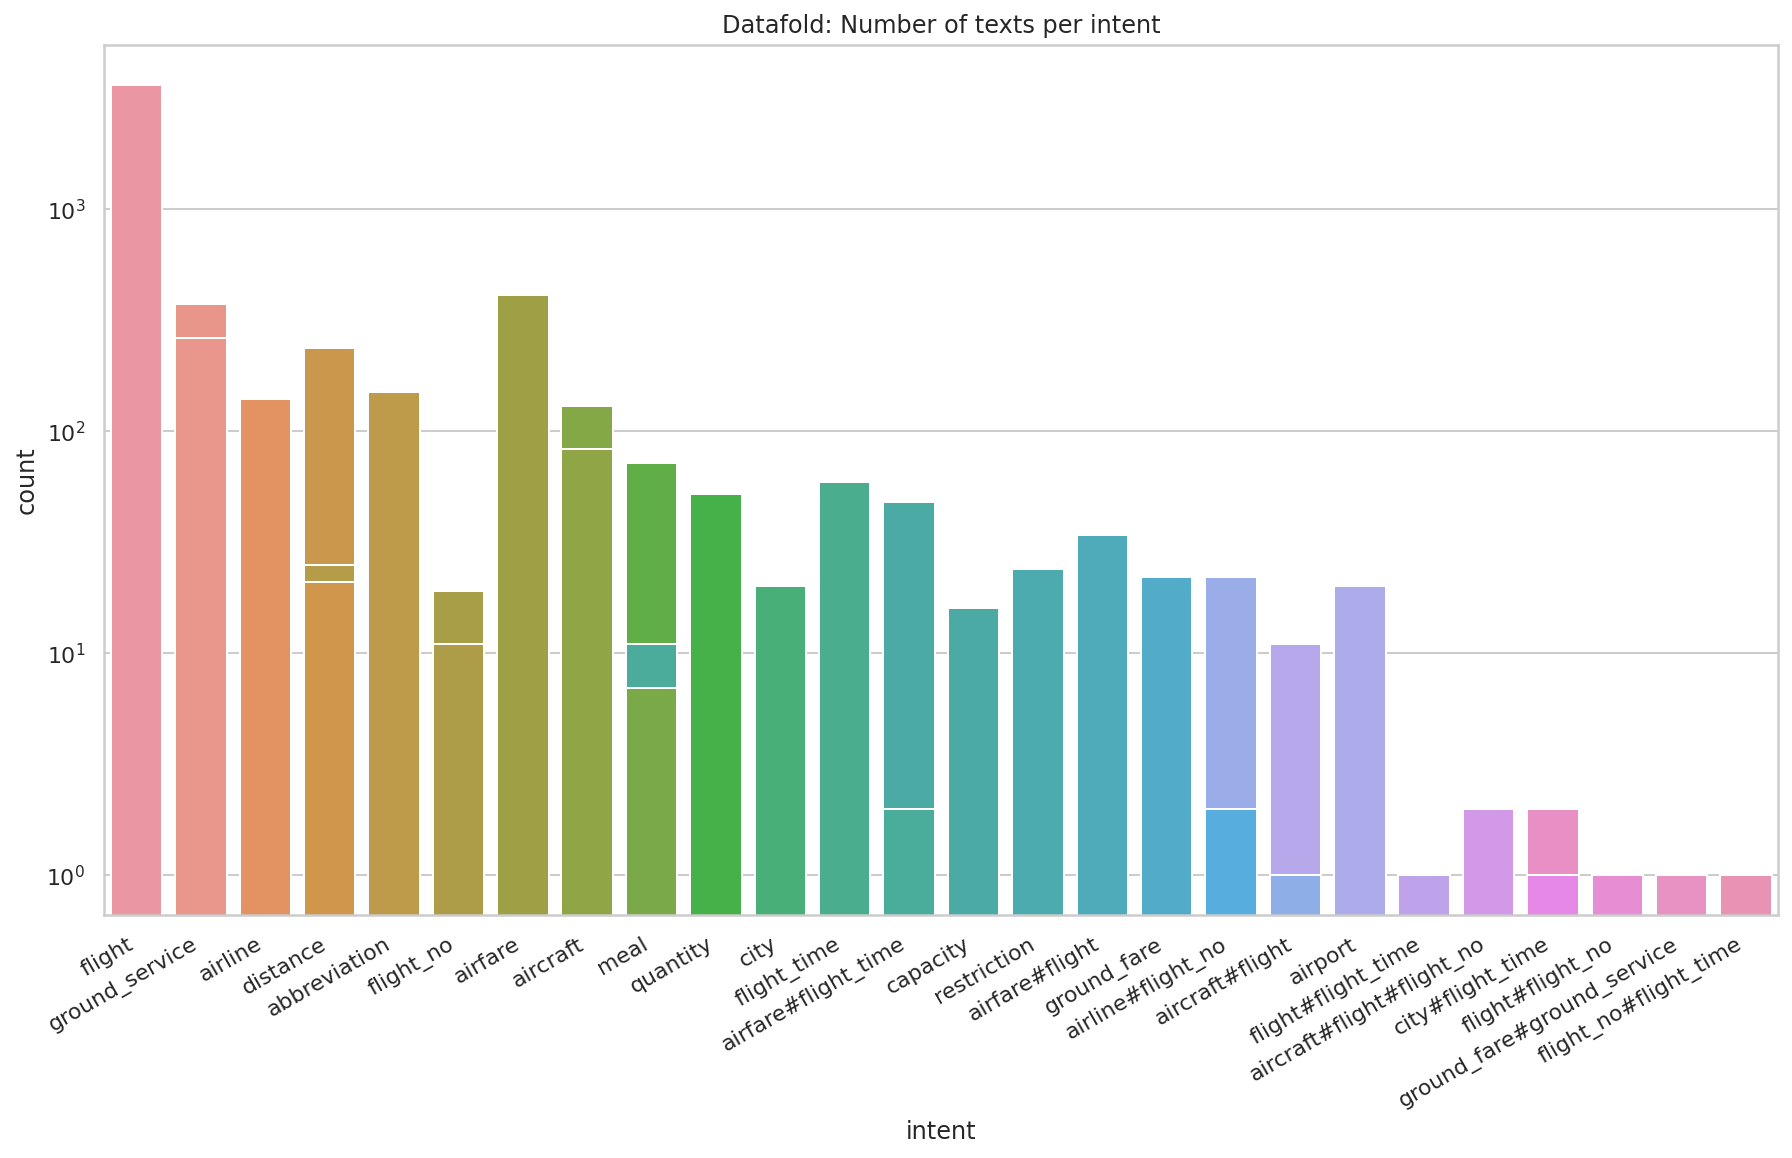

In [ ]:
#Visualize data
viz_set(train_in, train_label, 'Train')
viz_set(val_in, val_label, 'Validation')
viz_set(data.text, data.intent, 'Data')

In [ ]:
contents = data.text
intents = data.intent
sents = []

for i in range(len(intents)):
    sent = "<s> "+ intents[i] + " </s> " + contents[i]  +" </s>"
    sents.append(sent)

In [ ]:
sents

['<s> flight </s> ok hãy cho tôi biết chuyến bay sớm nhất khởi_hành giữa hạ_long và huế </s>',
 '<s> flight </s> tôi cần chuyến bay thẳng rẻ nhất từ hạ_long đến huế khởi_hành vào ngày 7 tháng 5 </s>',
 '<s> flight </s> cho tôi biết các chuyến bay còn chỗ từ phú_quốc đến vân_đồn vào thứ ba </s>',
 '<s> flight </s> tôi cần một danh_sách các chuyến bay vào buổi chiều muộn từ hà_nội đến tokyo </s>',
 '<s> flight </s> hãng hàng_không jetstar có chuyến bay từ lisbon đến thessaloniki tạm dừng ở viên và phục_vụ bữa trưa không </s>',
 '<s> flight </s> các chuyến bay vào thứ_bảy hoặc chủ_nhật giữa cà_mau và hải_phòng của hãng hàng_không jetstar </s>',
 '<s> flight </s> cho tôi biết các chuyến bay giữa cà_mau và hải_phòng vào thứ_bảy hoặc chủ_nhật của jetstar </s>',
 '<s> flight </s> tôi muốn biết một_số thông_tin về các chuyến bay rời thanh_hoá đến cần_thơ vào buổi chiều </s>',
 '<s> flight </s> các chuyến bay từ điện_biên_phủ đến cam_ranh vào chủ_nhật </s>',
 '<s> flight </s> cho tôi biết các c

In [ ]:
import random

sents=data.text
random.shuffle(sents)

valid_data = sents[:50]
test_data = sents[50:100]
train_data = sents[100:]


In [ ]:
def encode_bpe(data, name, target_dir):
  f = open(target_dir + "enc_" + name + ".bpe", "w")
  for line in data:
    bpe_enc = ""
    tokens = phoBERT.encode(line)
    for token in tokens:
      bpe_enc = bpe_enc + str(token.item()) + " "
    bpe_enc = bpe_enc + "\n"
    f.write(bpe_enc)

  f.close()

In [ ]:
path = "./enc_data/"
encode_bpe(train_data,"train",path)
encode_bpe(valid_data,"valid",path)
encode_bpe(test_data,"test",path)

In [ ]:
!fairseq-preprocess \
    --only-source \
    --trainpref /content/gdrive/MyDrive/NLP/BERT/enc_data/enc_train.bpe \
    --validpref /content/gdrive/MyDrive/NLP/BERT/enc_data/enc_valid.bpe \
    --testpref /content/gdrive/MyDrive/NLP/BERT/enc_data/enc_test.bpe \
    --srcdict /content/gdrive/MyDrive/NLP/BERT/PhoBERT_base_fairseq/dict.txt \
    --destdir data-bin/enc_data \
    --workers 60

2022-01-19 17:08:12 | INFO | fairseq_cli.preprocess | Namespace(align_suffix=None, alignfile=None, all_gather_list_size=16384, bf16=False, bpe=None, checkpoint_shard_count=1, checkpoint_suffix='', cpu=False, criterion='cross_entropy', dataset_impl='mmap', destdir='data-bin/enc_data', empty_cache_freq=0, fp16=False, fp16_init_scale=128, fp16_no_flatten_grads=False, fp16_scale_tolerance=0.0, fp16_scale_window=None, joined_dictionary=False, log_format=None, log_interval=100, lr_scheduler='fixed', memory_efficient_bf16=False, memory_efficient_fp16=False, min_loss_scale=0.0001, model_parallel_size=1, no_progress_bar=False, nwordssrc=-1, nwordstgt=-1, only_source=True, optimizer=None, padding_factor=8, profile=False, quantization_config_path=None, scoring='bleu', seed=1, source_lang=None, srcdict='/content/gdrive/MyDrive/NLP/BERT/PhoBERT_base_fairseq/dict.txt', target_lang=None, task='translation', tensorboard_logdir=None, testpref='/content/gdrive/MyDrive/NLP/BERT/enc_data/enc_test.bpe', tg

In [ ]:
!fairseq-train --fp16 data-bin/enc_data \
 --task masked_lm --lr 2e-05 --criterion masked_lm \
--arch roberta_base --sample-break-mode complete \
--tokens-per-sample 256 --optimizer adam --adam-betas '(0.9,0.98)' \
--adam-eps 1e-6 --clip-norm 0.0 \
--lr-scheduler polynomial_decay \
--warmup-updates 10000 --total-num-update 12000  \
--dropout 0.1 --attention-dropout 0.1 --weight-decay 0.01   \
--batch-size 32 --update-freq 1  --log-format simple \
--log-interval 1  --reset-optimizer --reset-dataloader \
--reset-meters  --sample-break-mode complete \
--restore-file PhoBERT_base_fairseq/model.pt  \
--skip-invalid-size-inputs-valid-test  \
--max-epoch 500 --no-epoch-checkpoints \
--no-last-checkpoints --no-save-optimizer-state

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
2022-01-19 18:11:13 | INFO | fairseq_cli.train | end of epoch 315 (average epoch stats below)
2022-01-19 18:11:13 | INFO | train | epoch 315 | loss 0.369 | ppl 1.29 | wps 13782.6 | ups 1.83 | wpb 7520 | bsz 31.4 | num_updates 6609 | lr 1.3218e-05 | gnorm 1.757 | loss_scale 2 | train_wall 11 | wall 3747
2022-01-19 18:11:13 | INFO | fairseq.trainer | begin training epoch 316
2022-01-19 18:11:13 | INFO | train_inner | epoch 316:      1 / 21 loss=0.418, ppl=1.34, wps=9453.2, ups=1.17, wpb=8094, bsz=32, num_updates=6610, lr=1.322e-05, gnorm=1.677, loss_scale=2, train_wall=0, wall=3748
2022-01-19 18:11:14 | INFO | train_inner | epoch 316:      2 / 21 loss=0.355, ppl=1.28, wps=11934.7, ups=1.49, wpb=8010, bsz=32, num_updates=6611, lr=1.3222e-05, gnorm=1.614, loss_scale=2, train_wall=1, wall=3748
2022-01-19 18:11:15 | INFO | train_inner | epoch 316:      3 / 21 loss=0.356, ppl=1.28, wps=12137.5, ups=1.56, wpb=7798, bsz=32, num_updates=66

In [ ]:
# Load the model in fairseq
from fairseq.data.encoders.fastbpe import fastBPE
from fairseq.models.roberta import RobertaModel
phoBERT = RobertaModel.from_pretrained('PhoBERT_base_fairseq', checkpoint_file="checkpoint_best.pt")

# Khởi tạo Byte Pair Encoding cho PhoBERT
class BPE():
  bpe_codes = 'PhoBERT_base_fairseq/bpe.codes'

args = BPE()
phoBERT.bpe = fastBPE(args) #Incorporate the BPE encoder into PhoBERT

In [ ]:
import random
import re

def gen_seed(seed, intent):
    #seed = "Bạn đã đặt vé máy_bay về Singapore."
    #intent = "flight"
    words = seed.split()

    seed = " ".join(words)

    gen_sentence = []
    for i in range(len(words)):
        tmp = words[i]
        words[i] = "<mask>"
        mask = "<s> "+intent+" </s> " + ' '.join(words) + " </s>"
        #print(mask)
        topk_filled_outputs = phoBERT.fill_mask(mask , topk=1)
        words[i] = tmp
        gen_sentence.append(topk_filled_outputs[0][2])

    #print(" ".join(gen_sentence))
    return " ".join(gen_sentence)

In [ ]:
iter_5 = ['airline#flight_no',
       'flight#flight_time','city#flight_time',
       'ground_fare#ground_service', 'flight_no#flight_time',
       'aircraft#flight#flight_no', 'aircraft#flight']

iter_1 = [ 'airfare#flight_time','city', 'ground_fare','restriction', 'airfare#flight','quantity']
iter_2 = ['meal','capacity','distance', 'flight_no','flight#flight_no']

In [ ]:
def generate(data, num_iter, group_iter):
    df =pd.DataFrame()
    for i in group_iter:
        a = data[data["intent"] == i]
        df= pd.concat([df, a], ignore_index=True)
    
    full = pd.DataFrame()
    full=pd.concat([full, df], ignore_index=True)
    #new = pd.DataFrame()
    while num_iter >0:
        for id, s in df.iterrows():
            s = gen_seed(s.text, s.intent)
            df.text[id] = s
        full=pd.concat([full, df], ignore_index=True)
        num_iter -=1
    
    return full
    

new1 = generate(data, 1 ,iter_1)


In [ ]:
new1

,text,intent
0,hiển_thị giá chuyến bay hạng hà_nội đà_lạt mùa hè,airfare#flight_time
1,chi_phí chuyến bay phú_quốc cam_ranh,airfare#flight_time
2,thành_phố hãng hàng_không jetstar phục_vụ,city
3,thành_phố phục_vụ hai hãng hàng_không vietjet ...,city
4,dli đà_lạt,city
...,...,...
303,Chuyến bay <unk> <unk> <unk> tại ngày Tân_Sơn_...,quantity
304,195 chuyến <unk> <unk> 35 <unk> <unk> <unk>,quantity
305,Giá vé <unk> 30 <unk> <unk> <unk>,quantity
306,Hãng hàng_không Vietnam_Airlines 10 <unk> bay ...,quantity


In [ ]:
new2 = generate(data, 2, iter_2)

In [ ]:
new5 = generate(data, 5, iter_5)

In [ ]:
new_data = pd.concat([new1, new2, new5],ignore_index=True)

In [ ]:
import pickle
def _save_pkl(path, obj):
  with open(path, 'wb') as f:
    pickle.dump(obj, f)

def _load_pkl(path):
  with open(path, 'rb') as f:
    obj = pickle.load(f)
  return obj

In [ ]:
_save_pkl("new_data.pkl", new_data)

In [ ]:
 gen_data = _load_pkl("new_data.pkl")
 gen_data.head(30)

,text,intent
0,chi_phí chuyến bay phú_quốc cam_ranh,airfare#flight_time
1,hiển_thị giá chuyến bay hạng hà_nội đà_lạt mùa hè,airfare#flight_time
2,mco,city
3,sân_bay lester pearson,city
4,dli đà_lạt,city
5,thành_phố bay hà_nội munchen quá_cảnh bắt chuy...,city
6,thành_phố qatar airways phục_vụ chuyến bay,city
7,vietnam airlines phục_vụ thành_phố,city
8,thành_phố chuyến bay vietjet,city
9,thành_phố phục_vụ hai hãng hàng_không vietjet ...,city
